# Linear Regression From Scratch

In this notebook, I will try to implement linear regression from scratch using nothing besides `numpy`, `pandas` and `matplotlib`. These three libraries are for matrix handling, data management, and algorithm visualization respectively. For the data, I decided to use a candy dataset to determine whether or not a specific sweet is either chocolate or candy. Let's jump into it!

## Import Libraries
Pretty self explanatory here :)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data
Here, we import the candy data csv located within this directory. After taking in the data as a dataframe, we drop the two columns because we don't need to use chocolate name and a non-relevant win percentage in our calculation. Likewise, we split the data into X (the features) and y (the predictions). The chocolate column (whether or not an entry is chocolate or not) becomes our Y variable and the remaining columns become factors/features used to predict that value.

In [9]:
df = pd.read_csv("candy-data.csv")
df = df.drop(columns = ['competitorname', 'winpercent'])

X = df.iloc[:, 1:]
y = df.iloc[:, 0][:, np.newaxis]

When we look at the data, we see that there are 85 total entries with 12 features each.

In [19]:
print(f'This dataset has {X.shape[0]} entries with {df.shape[1]} features')
print(f'The shape of X is: {X.shape}\nThe shape of y is: {y.shape}')

This dataset has 85 entries with 11 features
The shape of X is: (85, 11)
The shape of y is: (85, 1)


## Cost Function
Within this function, we will calculate the cost; the equation implemented is 1/2 * Mean Squared Error (MSE). In short, this just calculates how far off we are from the actual label of whether or not we have a chocolate or not. If you're unfamiliar with the `@` command, it's just the dot product (similar to `np.dot`)

In [11]:
def compute_cost(X, y, params):
    n = len(y)
    pred = X @ params

    return (1 / (2 * n)) * np.sum((pred - y)**2)

## Gradient Descent
This is the heart of the algorithm. Here, for every iteration, we calculate the partial derivative of the cost function and use a learning rate to update our parameters! 

We multiply the learning rate with the partial derivative of the cost function; the derivative informs us of the direction we should change our variable in.

In [12]:
def gradient_descent(X, y, params, learning_rate, iterations):
    num_samples = len(y)
    cost_history = []

    for i in range(iterations):
        params = params - (learning_rate/num_samples) * X.T @ (X @ params - y) 
        cost_history.append(compute_cost(X, y, params))

    return (cost_history, params)

## Normalization
This step normalizes our input data so that all values are rescaled between the values `[0, 1]`. This is done to decrease our overall cost and increase our accuracy on the problem

In [13]:
n = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X - mu) / sigma

# add bias term into X to avoid keeping track of it
X = np.hstack((np.ones((n, 1)), X))
n_features = np.size(X, 1)
params = np.zeros((n_features, 1))

Now, let's combine all the things we've learned and build the full model!

Initial cost:  0.21764705882352942 

Optimal parameters are: 
[[ 0.43529399]
 [-0.26827445]
 [-0.03002024]
 [ 0.03246823]
 [-0.01615199]
 [ 0.03059432]
 [-0.01911575]
 [ 0.11609403]
 [-0.00797628]
 [ 0.01947274]
 [ 0.05175128]]

Most important features determined by the algorithm: 
[('fruity', 0.43529399417329273), ('caramel', -0.2682744491689681), ('pluribus', 0.11609403084213005), ('nougat', 0.032468233412292824), ('hard', 0.03059432326508639), ('peanutyalmondy', -0.03002024138032047), ('pricepercent', 0.019472737570368572), ('bar', -0.01911575068810122), ('crispedricewafer', -0.016151994114632157), ('sugarpercent', -0.00797628452755172)]

Final cost:  0.04433152061220413


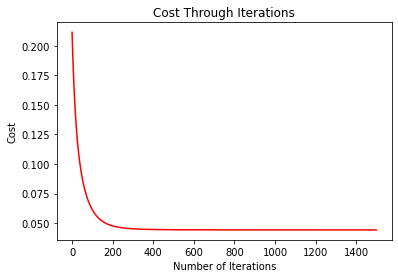

In [21]:
iterations = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost: ", initial_cost, "\n")

(cost_history, optimal_params) = gradient_descent(X, y, params, learning_rate, iterations)

print(f"Optimal parameters are: \n{optimal_params}\n")
print(f"Most important features determined by the algorithm: \n{sorted(zip(list(df)[1:], optimal_params[:, 0]), key = lambda x: -np.abs(x[1]))}\n")

print("Final cost: ", cost_history[-1])

# map our cost history
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Cost Through Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.savefig('candy_cost.png')
plt.show()